# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection, linear_model, datasets
from sklearn.metrics import mean_squared_error

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


# 2. Read Data

In [6]:
diabetes = datasets.load_diabetes()

In [7]:
type(diabetes) # dictionary 라고 생각하면 된다.

sklearn.utils.Bunch

In [9]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [21]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [10]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [16]:
feature_df = diabetes.data
print(feature_df.ndim)
feature_df.shape

2


(442, 10)

In [15]:
target_df = diabetes.target
print(target_df.ndim)
target_df.shape

1


(442,)

# 3. Feature Selection

In [ ]:
'''
bmi:3
bp:4
s6:10
'''

In [58]:
diabetes_x = feature_df[:,-2].reshape(442,1)
print(diabetes_x.ndim)
print(diabetes_x.shape)

2
(442, 1)


In [59]:
diabetes_y = target_df
print(diabetes_y.ndim)
print(diabetes_y.shape)

1
(442,)


# 4. Split into Training & Test data

In [60]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    diabetes_x, diabetes_y, test_size=0.3, random_state=42)

# 5. Create Model object

In [61]:
model = linear_model.LinearRegression()
model

LinearRegression()

# 6. Train Model object

In [62]:
model.fit(x_train, y_train)

LinearRegression()

# 7. Test Model object

In [65]:
print('MSE(Test data): ', mean_squared_error(model.predict(x_test), y_test))

MSE(Test data):  3044.5084727034587


In [66]:
print('MSRE(Test data): ', np.sqrt(mean_squared_error(model.predict(x_test), y_test)))

MSRE(Test data):  55.17706473439357


# 8. Visualization

In [64]:
%matplotlib inline

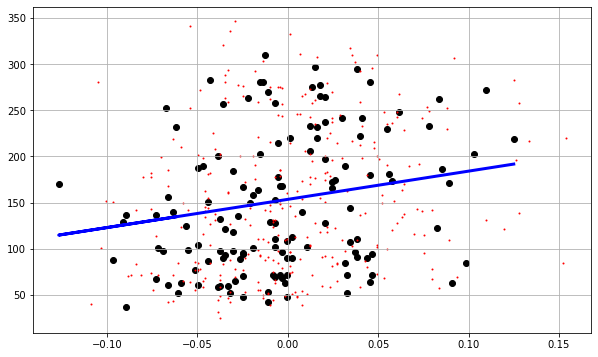

In [57]:
plt.figure(figsize=(10, 6))

plt.scatter(x_test, y_test, color="black")
plt.scatter(x_train, y_train, color="red", s=1)
plt.plot(x_test, model.predict(x_test), color="blue", linewidth=3)
plt.grid()
plt.show()

In [71]:
for i in range(len(diabetes.feature_names)):
    diabetes_x = feature_df[:,i:i+1].reshape(442,1)
    diabetes_y = target_df
    
    x_train, x_test, y_train, y_test = model_selection.train_test_split(diabetes_x, diabetes_y, test_size=0.3, random_state=42)
    
    model = linear_model.LinearRegression()
    model.fit(x_train, y_train)
    
    print(diabetes.feature_names[i] + 'Score')
    print("MSRE(Test data):",np.sqrt(mean_squared_error(model.predict(x_test), y_test)))

ageScore
MSRE(Test data): 72.49891644833504
sexScore
MSRE(Test data): 73.66993085687035
bmiScore
MSRE(Test data): 62.32926055201547
bpScore
MSRE(Test data): 66.61026730638129
s1Score
MSRE(Test data): 71.07200560112936
s2Score
MSRE(Test data): 72.08739740608164
s3Score
MSRE(Test data): 68.3579431499603
s4Score
MSRE(Test data): 66.43038449578502
s5Score
MSRE(Test data): 55.17706473439357
s6Score
MSRE(Test data): 68.09047955273391
